#<center> **News Classification and Categorization**</center> 




> ### **Data Pre-Processing**

In [108]:
#Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Loading the data
df = pd.read_csv('bbc-text.csv')

In [ ]:
#Viewing the data
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
#Checking for null
df.isna().any()

category    False
text        False
dtype: bool

In [ ]:
#checking for duplicate values
df.drop_duplicates()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
#Checking unique values
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
#Viewing the dataframe
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


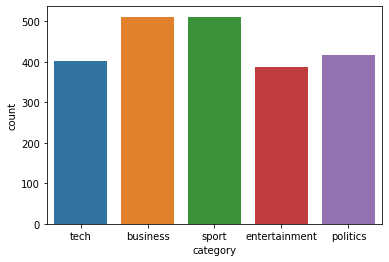

In [ ]:
#Plotting the distribution of categories
sns.countplot(df['category'])

In [ ]:
#Forming index
df['id'] = df['category'].factorize()[0]
labels = df.id  

In [ ]:
print("Text before Pre-Processing:\n",df['text'])

Text before Pre-Processing:
 0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object


In [56]:
# loading the stop words list, stemmer and lemmatizer
stop_words = stopwords.words('english')
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
def process_words(text):
    # tokenize the text
    words = text.split()
    new_words_list = []
    for word in words:
        # only add words which are not stop words
        if word not in stop_words:
            new_words=re.split("\\s+",word)
            stemmed_words=lemmatizer.lemmatize(word) if lemmatizer.lemmatize(word=word).endswith('e') else stemmer.stem(word=word)
            new_words_list.append(stemmed_words)
    return " ".join(new_words_list)

In [ ]:
def preprocess(text):
    # convert to lower case
    text = text.lower()
    # replace non-alphabets with null
    text = re.sub('[^a-zA-Z ]','',text)
    #remove stop words
    text = process_words(text)
    return text

In [58]:
# apply preprocessing on entire dataset
preprocess_df = df['text'].apply(lambda x:preprocess(x))
print(preprocess_df[:1])

0    tv future hand viewer home theatre system plas...
Name: text, dtype: object




> ### **Data Exploration**



In [59]:
cv = CountVectorizer()
counts = cv.fit_transform(preprocess_df)

In [60]:
print(cv.vocabulary_)

{'tv': 20656, 'future': 7743, 'hand': 8642, 'viewer': 21482, 'home': 9211, 'theatre': 19987, 'system': 19642, 'plasma': 15171, 'highdefinit': 9039, 'digit': 5264, 'video': 21469, 'record': 16324, 'move': 13127, 'live': 11560, 'room': 17076, 'way': 21765, 'people': 14872, 'watch': 21740, 'radic': 16046, 'differ': 5253, 'five': 7214, 'year': 22377, 'time': 20175, 'accord': 116, 'expert': 6682, 'panel': 14578, 'gather': 7869, 'annual': 813, 'consum': 4142, 'electron': 6086, 'show': 18136, 'la': 11029, 'vega': 21361, 'discuss': 5388, 'new': 13544, 'technolog': 19825, 'impact': 9642, 'one': 14105, 'favourite': 6942, 'pastime': 14712, 'us': 21227, 'lead': 11226, 'trend': 20484, 'programme': 15724, 'content': 4160, 'deliv': 5002, 'via': 21431, 'network': 13523, 'cable': 2849, 'satellite': 17408, 'telecom': 19853, 'compani': 3930, 'broadband': 2578, 'service': 17870, 'provid': 15803, 'front': 7650, 'portable': 15351, 'device': 5184, 'talkedabout': 19696, 'ce': 3207, 'person': 14933, 'dvr': 586



> #### **Word level – ngrams**



In [88]:
# unigrams
cv = CountVectorizer(ngram_range=(1,1),analyzer='word',preprocessor=preprocess)
count_unigram=cv.fit_transform(preprocess_df)

In [89]:
cv.vocabulary_

{'tv': 20531,
 'future': 7679,
 'hand': 8576,
 'viewer': 21353,
 'home': 9142,
 'theatre': 19862,
 'system': 19519,
 'plasma': 15070,
 'highdefinit': 8970,
 'digit': 5222,
 'video': 21340,
 'record': 16210,
 'move': 13040,
 'live': 11479,
 'room': 16961,
 'way': 21634,
 'people': 14772,
 'watch': 21609,
 'radic': 15934,
 'differ': 5211,
 'five': 7152,
 'year': 22244,
 'time': 20050,
 'accord': 114,
 'expert': 6624,
 'panel': 14479,
 'gather': 7805,
 'annual': 808,
 'consum': 4109,
 'electron': 6038,
 'show': 18019,
 'la': 10953,
 'vega': 21232,
 'discuss': 5346,
 'new': 13456,
 'technolog': 19701,
 'impact': 9572,
 'one': 14011,
 'favourite': 6881,
 'pastime': 14613,
 'us': 21099,
 'lead': 11149,
 'trend': 20359,
 'programme': 15615,
 'content': 4127,
 'deliv': 4964,
 'via': 21302,
 'network': 13435,
 'cable': 2833,
 'satellite': 17293,
 'telecom': 19729,
 'compani': 3901,
 'broadband': 2563,
 'service': 17753,
 'provid': 15692,
 'front': 7587,
 'portable': 15247,
 'device': 5143,
 'ta

In [90]:
#sort by descending order of counts
sorted_items=sort_order(count_unigram[0].tocoo())

#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=cv.get_feature_names()
n_grams=extract_sorted(feature_names,sorted_items,10)
n_grams

[('tv', 14),
 ('want', 7),
 ('us', 7),
 ('people', 7),
 ('brand', 7),
 ('record', 6),
 ('technolog', 5),
 ('network', 5),
 ('channel', 5),
 ('watch', 4)]

In [ ]:
plt.bar(*zip(*n_grams))
plt.xticks(rotation='vertical')

In [233]:
# bigrams
cv = CountVectorizer(ngram_range=(2,2),analyzer='word',preprocessor=preprocess)
count_bigram=cv.fit_transform(preprocess_df)

In [80]:
cv.vocabulary_

{'tv future': 282695,
 'future hand': 109033,
 'hand viewer': 120642,
 'viewer home': 291300,
 'home theatre': 126339,
 'theatre system': 272245,
 'system plasma': 267037,
 'plasma highdefinit': 200303,
 'highdefinit tv': 124294,
 'tv digit': 282670,
 'digit video': 74679,
 'video record': 291015,
 'record move': 219357,
 'move live': 174433,
 'live room': 155542,
 'room way': 229729,
 'way people': 295361,
 'people watch': 196569,
 'watch tv': 294849,
 'tv radic': 282777,
 'radic differ': 215462,
 'differ five': 74228,
 'five year': 102605,
 'year time': 306446,
 'time accord': 275191,
 'accord expert': 1298,
 'expert panel': 92870,
 'panel gather': 191881,
 'gather annual': 110842,
 'annual consum': 12765,
 'consum electron': 57631,
 'electron show': 84062,
 'show la': 246732,
 'la vega': 146512,
 'vega discuss': 289871,
 'discuss new': 75968,
 'new technolog': 181037,
 'technolog impact': 270159,
 'impact one': 130698,
 'one favourite': 186826,
 'favourite pastime': 96694,
 'pastime

In [234]:
def sort_order(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_sorted(feature_names, sorted_items, topn=10):
    """return n-gram counts in descending order of counts"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    results=[]
    
    # word index, count i
    for idx, count in sorted_items:
        
        # get the ngram name
        n_gram=feature_names[idx]
        
        # collect as a list of tuples
        results.append((n_gram,count))
 
    return results

In [235]:
#sort by descending order of counts
sorted_items=sort_order(count_bigram[0].tocoo())

#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=cv.get_feature_names()
n_grams=extract_sorted(feature_names,sorted_items,10)
n_grams

[('highdefinit tv', 3),
 ('year time', 2),
 ('way people', 2),
 ('want watch', 2),
 ('video record', 2),
 ('us lead', 2),
 ('tv set', 2),
 ('tv hour', 2),
 ('people watch', 2),
 ('people find', 2)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

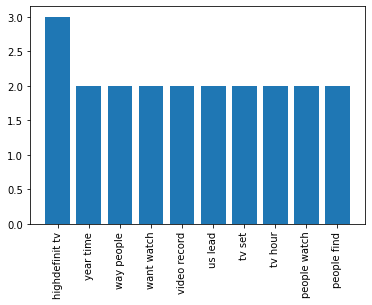

In [237]:
plt.bar(*zip(*n_grams))
plt.xticks(rotation='vertical')



> #### **Character level- ngrams**



In [91]:
# unigrams
cv = CountVectorizer(ngram_range=(1,1),analyzer='char_wb',preprocessor=preprocess)
count_char_unigram=cv.fit_transform(preprocess_df)

In [92]:
cv.vocabulary_

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [93]:
#sort by descending order of counts
sorted_items=sort_order(count_char_unigram[0].tocoo())

#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=cv.get_feature_names()
n_grams=extract_sorted(feature_names,sorted_items,10)
n_grams

[(' ', 814),
 ('e', 272),
 ('a', 172),
 ('t', 167),
 ('o', 158),
 ('r', 148),
 ('n', 148),
 ('i', 137),
 ('l', 117),
 ('c', 103)]

In [95]:
# bigrams
cv = CountVectorizer(ngram_range=(2,2),analyzer='char_wb',preprocessor=preprocess)
count_char_bigram=cv.fit_transform(preprocess_df)

In [ ]:
plt.bar(*zip(*n_grams))
plt.xticks(rotation='vertical')

In [96]:
cv.vocabulary_

{' a': 0,
 ' b': 1,
 ' c': 2,
 ' d': 3,
 ' e': 4,
 ' f': 5,
 ' g': 6,
 ' h': 7,
 ' i': 8,
 ' j': 9,
 ' k': 10,
 ' l': 11,
 ' m': 12,
 ' n': 13,
 ' o': 14,
 ' p': 15,
 ' q': 16,
 ' r': 17,
 ' s': 18,
 ' t': 19,
 ' u': 20,
 ' v': 21,
 ' w': 22,
 ' x': 23,
 ' y': 24,
 ' z': 25,
 'a ': 26,
 'aa': 27,
 'ab': 28,
 'ac': 29,
 'ad': 30,
 'ae': 31,
 'af': 32,
 'ag': 33,
 'ah': 34,
 'ai': 35,
 'aj': 36,
 'ak': 37,
 'al': 38,
 'am': 39,
 'an': 40,
 'ao': 41,
 'ap': 42,
 'aq': 43,
 'ar': 44,
 'as': 45,
 'at': 46,
 'au': 47,
 'av': 48,
 'aw': 49,
 'ax': 50,
 'ay': 51,
 'az': 52,
 'b ': 53,
 'ba': 54,
 'bb': 55,
 'bc': 56,
 'bd': 57,
 'be': 58,
 'bg': 59,
 'bh': 60,
 'bi': 61,
 'bj': 62,
 'bl': 63,
 'bm': 64,
 'bn': 65,
 'bo': 66,
 'bp': 67,
 'br': 68,
 'bs': 69,
 'bt': 70,
 'bu': 71,
 'bv': 72,
 'bw': 73,
 'by': 74,
 'bz': 75,
 'c ': 76,
 'ca': 77,
 'cb': 78,
 'cc': 79,
 'cd': 80,
 'ce': 81,
 'cf': 82,
 'cg': 83,
 'ch': 84,
 'ci': 85,
 'cj': 86,
 'ck': 87,
 'cl': 88,
 'cm': 89,
 'cn': 90,
 'co': 91

In [97]:
#sort by descending order of counts
sorted_items=sort_order(count_char_bigram[0].tocoo())

#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=cv.get_feature_names()
n_grams=extract_sorted(feature_names,sorted_items,10)
n_grams

[('e ', 83),
 ('t ', 52),
 ('d ', 49),
 ('an', 43),
 (' t', 42),
 (' p', 39),
 ('er', 35),
 (' s', 35),
 (' c', 33),
 ('ch', 32)]

In [ ]:
plt.bar(*zip(*n_grams))
plt.xticks(rotation='vertical')



> ### **Data Modelling**



In [98]:
new_x = counts

In [99]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'] )
print("Label Encodings:",y)

Label Encodings: [4 0 3 ... 1 2 3]


In [100]:
X_train, X_test, y_train, y_test = train_test_split(new_x,y,test_size=0.15)

In [101]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1891, 22533)
X_test shape: (334, 22533)
y_train shape: (1891,)
y_test shape: (334,)


In [111]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=1000),
    DecisionTreeClassifier()
]

In [112]:
for model in models:
  model_name = model.__class__.__name__
  model.fit(X_train, y_train)
  print("Model name=",model_name)
  y_pred=model.predict(X_test)
  print(metrics.accuracy_score(y_pred, y_test))
    

Model name= RandomForestClassifier
0.8502994011976048
Model name= MultinomialNB
0.9790419161676647
Model name= LogisticRegression
0.9700598802395209
Model name= DecisionTreeClassifier
0.8622754491017964




> #### **Hyperparameter Tuning**



In [113]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0.5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(preprocess_df).toarray()                 

In [114]:
features.shape 

(2225, 2)

In [148]:
n_estimators = [100, 20]
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
penalty = ['l1','l2']
criterion = ['gini','entropy']

param_RandomForestClassifier = dict(n_estimators=n_estimators)
param_MultinomialNB = dict(alpha=alpha)
param_LogisticRegression = dict(penalty=penalty)
param_DecisionTreeClassifier = dict(criterion=criterion)

In [225]:
from sklearn.model_selection import GridSearchCV
entries=[]
accuracies=[]
for model in models:
  model_name = model.__class__.__name__
  for cv in range(2,5):
    grid_search = GridSearchCV(estimator=model, param_grid=locals()['param_{}'.format(model_name)],cv=cv,scoring='accuracy')
    grid_result = grid_search.fit(X_train, y_train)
    accuracies=grid_result.best_score_
    entries.append((model_name, accuracies))
  print("Model name=", model_name," ","Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  


Model name= RandomForestClassifier   Best: 0.833434 using {'n_estimators': 100}
Model name= MultinomialNB   Best: 0.977795 using {'alpha': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


Model name= LogisticRegression   Best: 0.971450 using {'penalty': 'l2'}
Model name= DecisionTreeClassifier   Best: 0.841370 using {'criterion': 'gini'}


In [226]:
cv_df = pd.DataFrame(entries, columns=['model_name','accuracy'])

In [228]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.835541
LogisticRegression        0.968451
MultinomialNB             0.975677
RandomForestClassifier    0.841711
Name: accuracy, dtype: float64

In [229]:
cv_df

,model_name,accuracy
0,RandomForestClassifier,0.844000
1,RandomForestClassifier,0.847700
2,RandomForestClassifier,0.833434
3,MultinomialNB,0.970917
4,MultinomialNB,0.978319
5,MultinomialNB,0.977795
6,LogisticRegression,0.964043
7,LogisticRegression,0.969860
8,LogisticRegression,0.971450
9,DecisionTreeClassifier,0.832362


In [230]:
model = LogisticRegression(random_state=0,max_iter=1000,penalty='l2')

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)


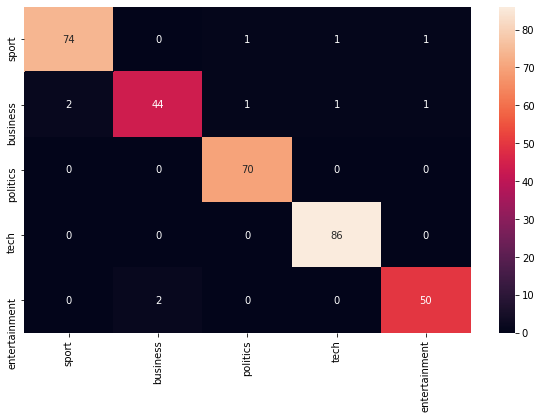

In [249]:
cm = confusion_matrix(y_test, y_pred)
index = ['sport','business','politics','tech','entertainment']  
columns = ['sport','business','politics','tech','entertainment']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
plt.xticks(rotation=90)
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(cm_df, annot=True)